In [113]:
from operator import itemgetter
import nltk
import pandas as pd
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

In [114]:
freq = {}
words_doc_PCR = nltk.corpus.reader.PlaintextCorpusReader('../data', 'twain-tomsawyer.txt')
stop_words = set(stopwords.words('english'))

In [115]:
words_doc = words_doc_PCR.words()
words_doc = [word.lower() for word in words_doc if word.isalpha()]
# words_doc = [word for word in words_doc if word not in stop_words]

In [116]:
# start_idx = words_doc.index('ILLUSTRATIONS'.lower()) + 1
# words_doc = words_doc[start_idx:]

In [117]:
words_doc_PCR.raw()[:300], words_doc_PCR.words()[:300]

('The Project Gutenberg eBook of The Adventures of Tom Sawyer, by Mark Twain\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof th',
 ['The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', ...])

In [118]:
list(stop_words)[:10]

['now', 'at', 'until', 'y', 'himself', 'being', 'while', 'doesn', 'does', 'in']

In [119]:
len(words_doc), words_doc[:5]

(77276, ['the', 'project', 'gutenberg', 'ebook', 'of'])

In [120]:
for word in words_doc :
    count = freq.get(word , 0)
    freq[word] = count + 1

In [121]:
freq

{'the': 3984,
 'project': 88,
 'gutenberg': 98,
 'ebook': 13,
 'of': 1590,
 'adventures': 13,
 'tom': 823,
 'sawyer': 40,
 'by': 305,
 'mark': 6,
 'twain': 3,
 'this': 338,
 'is': 197,
 'for': 559,
 'use': 33,
 'anyone': 5,
 'anywhere': 10,
 'in': 1016,
 'united': 19,
 'states': 23,
 'and': 3192,
 'most': 49,
 'other': 126,
 'parts': 2,
 'world': 38,
 'at': 386,
 'no': 279,
 'cost': 5,
 'with': 694,
 'almost': 37,
 'restrictions': 2,
 'whatsoever': 2,
 'you': 951,
 'may': 25,
 'copy': 12,
 'it': 1332,
 'give': 50,
 'away': 134,
 'or': 225,
 're': 81,
 'under': 94,
 'terms': 23,
 'license': 18,
 'included': 3,
 'online': 4,
 'www': 10,
 'org': 10,
 'if': 259,
 'are': 73,
 'not': 314,
 'located': 7,
 'will': 74,
 'have': 168,
 'to': 1808,
 'check': 4,
 'laws': 13,
 'country': 15,
 'where': 79,
 'before': 105,
 'using': 9,
 'title': 1,
 'author': 3,
 'samuel': 2,
 'clemens': 2,
 'release': 1,
 'date': 3,
 'july': 2,
 'recently': 1,
 'updated': 2,
 'march': 3,
 'language': 5,
 'english': 3

In [122]:
rank = 1
df = pd.DataFrame(columns=['Rank', 'Frequency', 'Frequency * Rank'])
collection = sorted(freq.items(), key=itemgetter(1), reverse = True)

In [123]:
for word , freq_ in collection:
    df.loc[word] = [rank, freq_, rank*freq_]
    rank = rank + 1

In [132]:
df

,Rank,Frequency,Frequency * Rank
the,1,3984,3984
and,2,3192,6384
a,3,1955,5865
to,4,1808,7232
of,5,1590,7950
...,...,...,...
edition,7603,1,7603
pg,7604,1,7604
includes,7605,1,7605
subscribe,7606,1,7606


In [124]:
df.head(20)

,Rank,Frequency,Frequency * Rank
the,1,3984,3984
and,2,3192,6384
a,3,1955,5865
to,4,1808,7232
of,5,1590,7950
it,6,1332,7992
he,7,1252,8764
was,8,1168,9344
that,9,1041,9369
in,10,1016,10160


In [125]:
df.tail(20)

,Rank,Frequency,Frequency * Rank
donors,7588,1,7588
approach,7589,1,7589
offers,7590,1,7590
international,7591,1,7591
swamp,7592,1,7592
web,7593,1,7593
donation,7594,1,7594
card,7595,1,7595
michael,7596,1,7596
hart,7597,1,7597


In [141]:
import matplotlib.pyplot 

(array([ 834.,  951., 1344., 1765., 2082.,  366.,   47.,   90.,  125.,
           3.]),
 array([3970.0, 4803.0, 5636.0, 6469.0, 7302.0, 8135.0, 8968.0, 9801.0,
        10634.0, 11467.0, 12300.0], dtype=object),
 <BarContainer object of 10 artists>)

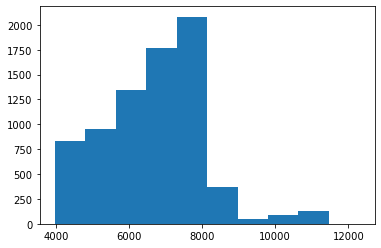

In [142]:
plt.hist(df['Frequency * Rank'])

In [150]:
np.log10(2)

0.3010299956639812

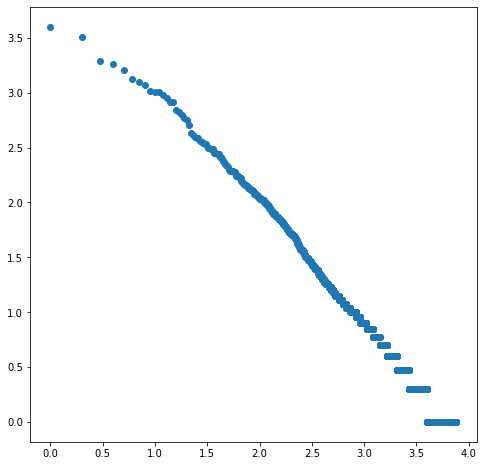

In [164]:
x = np.array(df['Rank'], dtype='int64')
y = np.array(df['Frequency'], dtype='int64')
plt.figure(figsize=(8, 8))
plt.scatter(np.log10(x), np.log10(y))
plt.show()

In [134]:
df[df['Rank'] >1000].head(10)

,Rank,Frequency,Frequency * Rank
beautiful,1001,8,8008
scarcely,1002,8,8016
others,1003,8,8024
cannot,1004,8,8032
crack,1005,8,8040
history,1006,8,8048
believed,1007,8,8056
laughter,1008,8,8064
tooth,1009,8,8072
tone,1010,8,8080


In [135]:
df[df['Rank'] >2000].head(10)

,Rank,Frequency,Frequency * Rank
scrape,2001,4,8004
straightway,2002,4,8008
opinion,2003,4,8012
dug,2004,4,8016
feast,2005,4,8020
yield,2006,4,8024
driving,2007,4,8028
dawned,2008,4,8032
length,2009,4,8036
hundreds,2010,4,8040


In [136]:
df[df['Rank'] >3000].head(10)

,Rank,Frequency,Frequency * Rank
benediction,3001,2,6002
worship,3002,2,6004
courses,3003,2,6006
originality,3004,2,6008
grim,3005,2,6010
distracting,3006,2,6012
recreations,3007,2,6014
manage,3008,2,6016
pressure,3009,2,6018
system,3010,2,6020


In [137]:
df[df['Rank'] >4000].head(10)

,Rank,Frequency,Frequency * Rank
asserts,4001,1,4001
eloquence,4002,1,4002
lengthy,4003,1,4003
expects,4004,1,4004
diamonds,4005,1,4005
doubts,4006,1,4006
detectives,4007,1,4007
mounts,4008,1,4008
pic,4009,1,4009
nic,4010,1,4010
